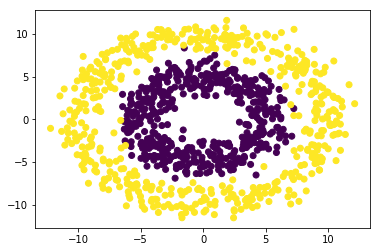

In [2]:
import matplotlib.pyplot as plt
import numpy as np
N=1000
D=2
r1=5.0
r2=10.0

R1=np.random.randn(500)+r1
# polar coordinates
theta=2*np.pi*np.random.randn(500)
X1=np.concatenate([[R1*np.cos(theta)],[R1*np.sin(theta)]]).T

R2=np.random.randn(500)+r2
# polar coordinates
theta=2*np.pi*np.random.randn(500)
X2=np.concatenate([[R2*np.cos(theta)],[R2*np.sin(theta)]]).T


X=np.concatenate((X1,X2))
y=np.array([0]*500+[1]*500)

plt.scatter(X[:,0],X[:,1],c=y)
plt.show()

In [20]:
def one_hot_encoder(X):
    N=X.shape[0]
    K=len(np.unique(X))
    Z=np.zeros((N,K))
    for i in range(N):
        c=int(X[i])
        Z[i,c]=1
    return Z
def sigmoid(z):
    return 1/(1+np.exp(-z))
def softmax(a):
    return np.exp(a)/(np.exp(a)).sum(axis=1,keepdims=True)
def feed_forward(X,W1,b1,W2,b2):
    z=sigmoid(X.dot(W1)+b1)
    y=softmax(z.dot(W2)+b2)
    return y,z
def cross_entropy(y,y_p):
    return -np.mean(y*np.log(y_p))
def class_rate(y,y_p):
    n_t=0
    n_c=0
    for i in range(len(y)):
        n_t+=1
        if y[i]==y_p[i]:
            n_c+=1
    return n_c/n_t
def dW2(y,y_p,z):
    return z.T.dot((y_p-y))
def db2(y,y_p):
    return (y_p-y).sum(axis=0)
def dW1(y,y_p,z,W2,X):
    dz=(y_p-y).dot(W2.T)*z*(1-z)
    return X.T.dot(dz)
def db1(y,y_p,z,W2):
    return (y_p-y).dot(W2.T)*z*(1-z)
def train_nn(X,y,W1,b1,W2,b2,lr,epoch):
    cost=[]
    cl=[]
    for i in range(epoch):
        y_p,z=feed_forward(X,W1,b1,W2,b2)
        W2=W2-lr*dW2(y,y_p,z)
        b2=b2-lr*db2(y,y_p)
        W1=W1-lr*dW1(y,y_p,z,W2,X)
        b1=b1-lr*db1(y,y_p,z,W2)
        cost.append(cross_entropy(y,y_p))
        cl.append(class_rate(y.argmax(axis=1),y_p.argmax(axis=1)))
        if i % 100 == 0:
            print('Cost: {0} ClassRate: {1}'.format(cost[i],cl[i]))
    return y_p,cost,cl,W1,W2,b1,b2

In [21]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [22]:
one_hot_encoder(y)

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [0., 1.],
       [0., 1.],
       [0., 1.]])

In [26]:
M=4
K=len(np.unique(y))
W1=np.random.randn(D,M)
b1=np.random.randn(M)
W2=np.random.randn(M,K)
b2=np.random.randn(K)
y_p,cost,cl,W1,W2,b1,b2=train_nn(X,one_hot_encoder(y),W1,b1,W2,b2,0.0005,10000)

Cost: 0.3364514126313486 ClassRate: 0.573
Cost: 0.3120573229035751 ClassRate: 0.718
Cost: 0.2954634966331819 ClassRate: 0.719
Cost: 0.281292988622068 ClassRate: 0.727
Cost: 0.30761514540152973 ClassRate: 0.688
Cost: 0.3006103514309392 ClassRate: 0.705
Cost: 0.29612246553768284 ClassRate: 0.714
Cost: 0.28347030889782027 ClassRate: 0.728
Cost: 0.26361876053673466 ClassRate: 0.733
Cost: 0.25994851429473953 ClassRate: 0.676
Cost: 0.25969235852784095 ClassRate: 0.662
Cost: 0.2592746790149349 ClassRate: 0.655
Cost: 0.25850136511329813 ClassRate: 0.673
Cost: 0.2819092932374237 ClassRate: 0.684
Cost: 0.24154269962564429 ClassRate: 0.738
Cost: 0.24821687950996216 ClassRate: 0.696
Cost: 0.2533358438419913 ClassRate: 0.69
Cost: 0.23623250389452327 ClassRate: 0.69
Cost: 0.20333695364080648 ClassRate: 0.84
Cost: 0.21953742521573263 ClassRate: 0.728
Cost: 0.17621859835196585 ClassRate: 0.926
Cost: 0.20780630596713529 ClassRate: 0.823
Cost: 0.1919215228393008 ClassRate: 0.826
Cost: 0.1932865228959436

In [17]:
K=len(np.unique(y))
K

2

In [19]:
y_p.shape

NameError: name 'y_p' is not defined